In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from decimal import *

In [2]:
A=np.load("A_and_W_storage/A.npy")
W=np.load("A_and_W_storage/W.npy")
#print(np.shape(A))


In [3]:
thetaP=np.load("A_and_W_storage/thetaP_x.npy")
thetaR=np.load("A_and_W_storage/thetaR_y.npy")
lamda_16_lamda_15=np.load("A_and_W_storage/lamda_16_lamda_15.npy")


In [4]:
fig = go.Figure(data = [
    go.Surface(x=thetaR ,y=thetaP ,z=lamda_16_lamda_15,
        colorscale='Hot',
    )])

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))


fig.update_layout(scene = dict(
                    xaxis_title='thetaR',
                    yaxis_title='thetaP'),
                    title='Quotient of the eigenvalues as a function of the angles',
                    #scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                    width=500, height=500,
                    margin=dict(l=65, r=50, b=65, t=90),
                    autosize=False
                    )


fig.show()

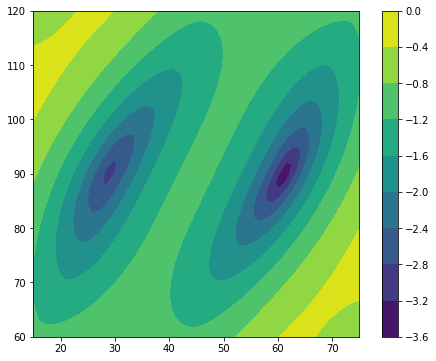

In [5]:
plt.figure(figsize=(8,6) , facecolor='w')
h = plt.contourf(thetaR,thetaP, lamda_16_lamda_15)
plt.axis('scaled')
plt.colorbar()
plt.show()

In [6]:
#fig = make_subplots(rows=2, cols=2, subplot_titles=('connectgaps = False',
                                                        #'connectgaps = True'))
fig = go.Figure(data =
    go.Contour(x=thetaR,y=thetaP,z=lamda_16_lamda_15,
        colorscale='Hot',
        contours=dict(
            #start=0,
            #end=8,
            #size=2,
        ),
    ))

fig['layout'].update(title='Quotient of the eigenvalues as a function of the angles')
fig['layout']['xaxis'].update(title='thetaR')
fig['layout']['yaxis'].update(title='thetaP')

                    
fig.show()

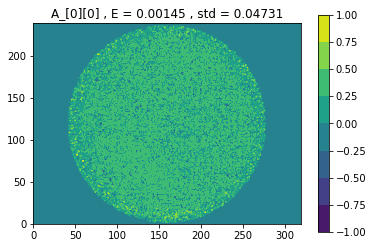

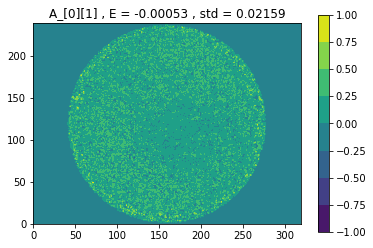

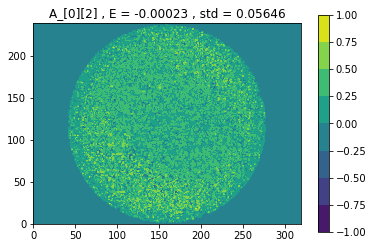

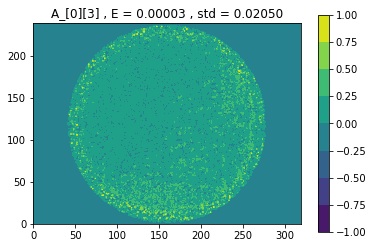

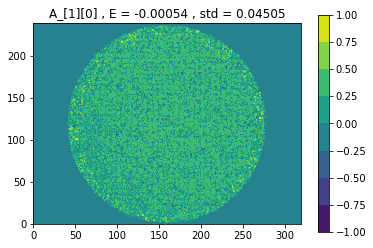

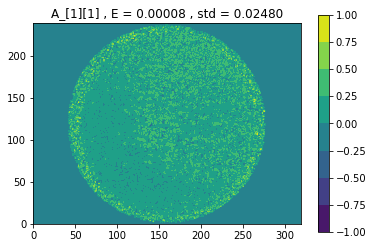

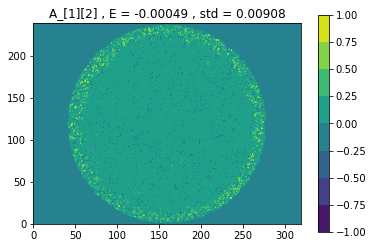

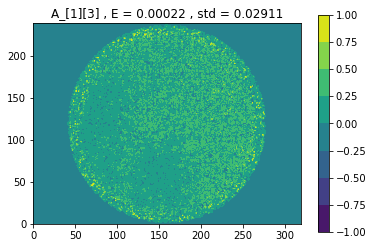

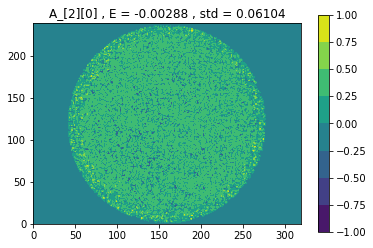

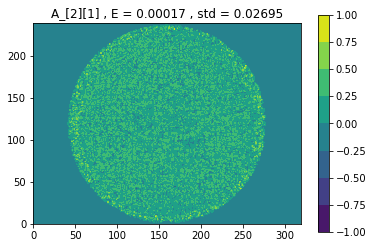

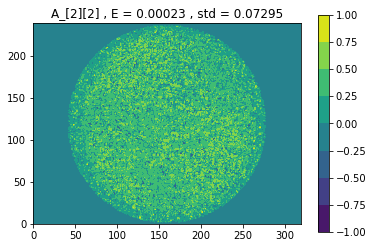

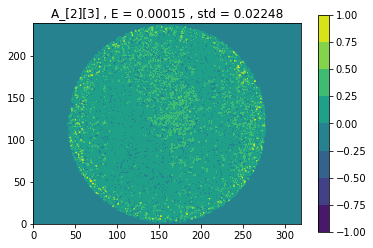

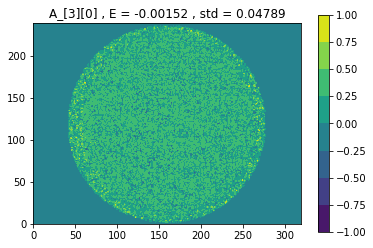

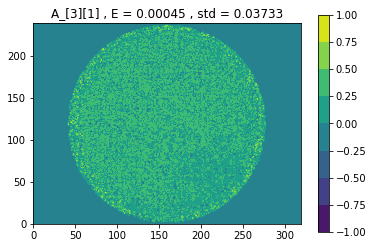

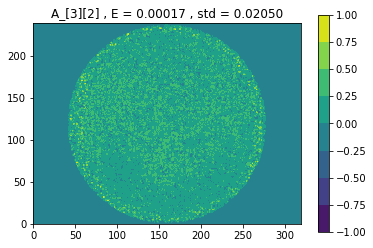

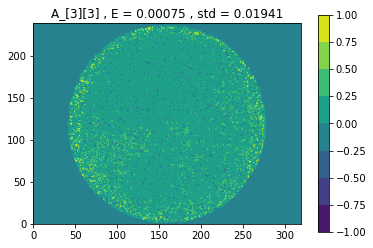

In [7]:
A11 = A[:,:,0,0]
for i in range(4):
    for j in range(4):
        Aij = A[:,:,i,j]
        size = np.size(Aij)
        mean = (1/size)*np.einsum('ij->',Aij)
        std_ = (1/size)*np.einsum('ij->',(Aij-mean)**2)
        mean = "%.5f" % mean
        std_ = "%.5f" % std_
        #Aij = Aij
        h = plt.contourf(Aij)
        plt.axis('scaled')
        plt.title(f'A_[{i}][{j}] , E = {mean} , std = {std_}')
        plt.colorbar(h)
        plt.show()

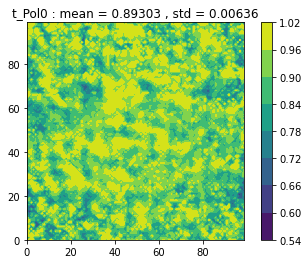

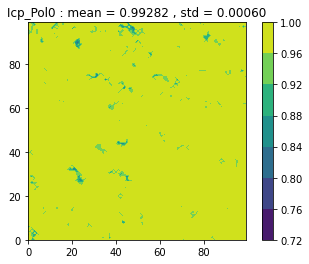

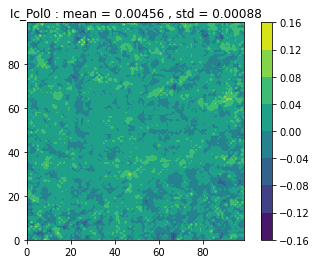

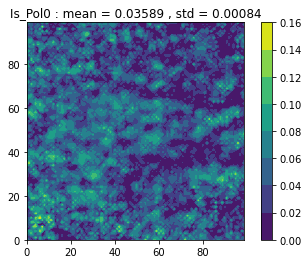

In [28]:
##Load parameters of the Polarisor oriented at 0
t_Pol0 = np.load("parameters_storage/t_Pol0.npy")
Icp_Pol0 = np.load("parameters_storage/Icp_Pol0.npy")
Ic_Pol0 = np.load("parameters_storage/Ic_Pol0.npy" )
Is_Pol0 = np.load("parameters_storage/Is_Pol0.npy" )
##Put these parameters in dictionary
parameters = {'t_Pol0':t_Pol0 , 'Icp_Pol0':Icp_Pol0 ,  'Ic_Pol0':Ic_Pol0, 'Is_Pol0':Is_Pol0}

##Plot these parameters
size_matrix_x = np.shape(t_Pol0)[0]
size_matrix_y = np.shape(t_Pol0)[1]
sizewindow = 50
for key in parameters.keys():  
    center_x = size_matrix_x//2
    center_y = size_matrix_y//2
    param = parameters[key]
    param_window = param[center_x-sizewindow:center_x+sizewindow, center_y -sizewindow:center_y +sizewindow]
    size=np.size(param)      
    mean = (1/size)*np.einsum('ij->',param)
    std_ = (1/size)*(np.einsum('ij->',(param-mean)**2))
    mean = "%.5f" % mean
    std_ = "%.5f" % std_
    h = plt.contourf(param)
    plt.axis('scaled')
    plt.title(f'{key} : mean = {mean} , std = {std_}')
    plt.colorbar(h)
    plt.show()


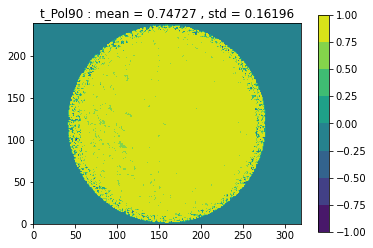

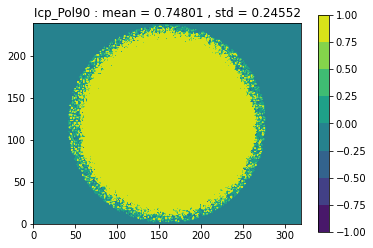

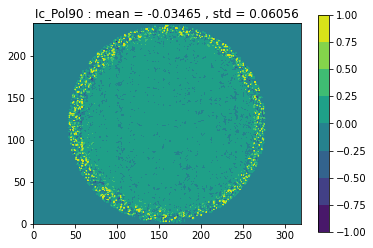

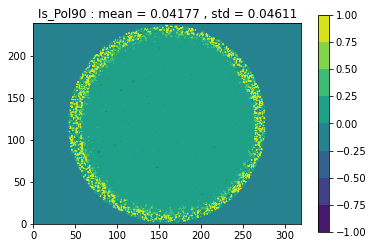

In [23]:
##Load parameters of the Polarisor oriented at 90
t_Pol90 = np.load("parameters_storage/t_Pol90.npy")
Icp_Pol90 = np.load("parameters_storage/Icp_Pol90.npy")
Ic_Pol90 = np.load("parameters_storage/Ic_Pol90.npy" )
Is_Pol90 = np.load("parameters_storage/Is_Pol90.npy" )
##Put these parameters in dictionary
parameters = {'t_Pol90':t_Pol90 , 'Icp_Pol90':Icp_Pol90 ,  'Ic_Pol90':Ic_Pol90, 'Is_Pol90':Is_Pol90}

##Plot these parameters
size = np.size(t_Pol90)
count = np.sum(t_Pol90!=0)
for key in parameters.keys():
    param = parameters[key]
    mean = (1/count)*np.einsum('ij->',param)
    std_ = (1/count)*(np.einsum('ij->',(param-mean)**2) - (size-count)*(mean**2))
    mean = "%.5f" % mean
    std_ = "%.5f" % std_
    h = plt.contourf(param)
    plt.axis('scaled')
    plt.title(f'{key} : mean = {mean} , std = {std_}')
    plt.colorbar(h)
    plt.show()

0.0


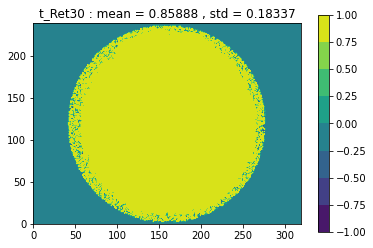

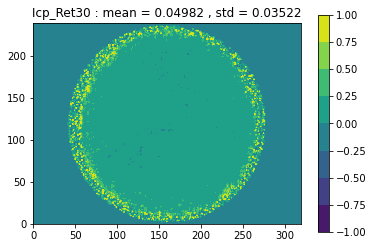

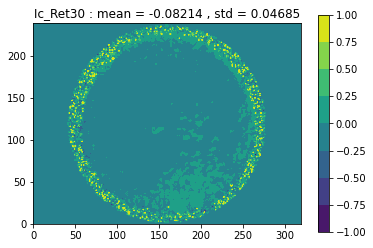

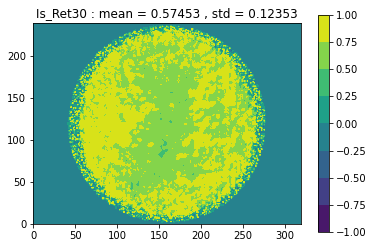

In [24]:
##Load parameters of the Retardator oriented at 30
t_Ret30 = np.load("parameters_storage/t_Ret30.npy")
print(t_Ret30[15,290])
Icp_Ret30 = np.load("parameters_storage/Icp_Ret30.npy")
Ic_Ret30 = np.load("parameters_storage/Ic_Ret30.npy" )
Is_Ret30 = np.load("parameters_storage/Is_Ret30.npy" )
##Put these parameters in dictionary
parameters = {'t_Ret30':t_Ret30 , 'Icp_Ret30':Icp_Ret30 ,  'Ic_Ret30':Ic_Ret30, 'Is_Ret30':Is_Ret30}

##Plot these parameters
size = np.size(t_Ret30)
count = np.sum(t_Ret30!=0)
for key in parameters.keys():
    param = parameters[key]
    mean = (1/count)*np.einsum('ij->',param)
    std_ = (1/count)*(np.einsum('ij->',(param-mean)**2) - (size-count)*(mean**2))
    mean = "%.5f" % mean
    std_ = "%.5f" % std_
    h = plt.contourf(param)
    plt.axis('scaled')
    plt.title(f'{key} : mean = {mean} , std = {std_}')
    plt.colorbar(h)
    plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'